   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
     total_bill   tip     sex smoker   day    time  size
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-

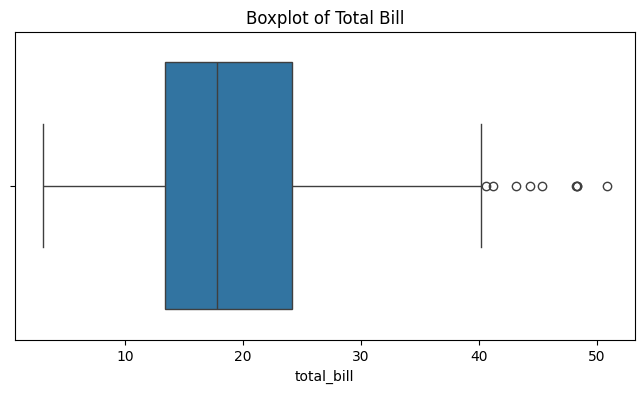

Mean: 18.82346153846154
Median: 17.465
Trimmed Mean (10%): 18.195478723404257
Range: 37.1
Variance: 55.42335406074612
Std deviation: 7.44468629700044


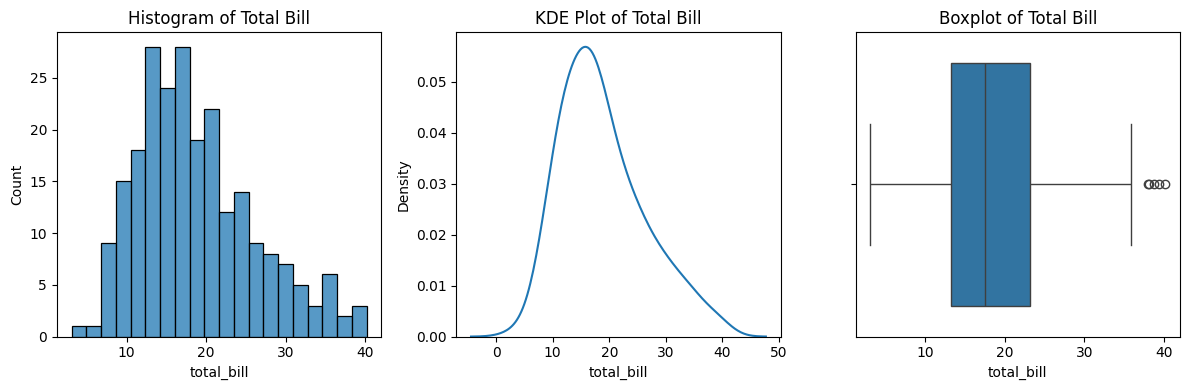

day
Sat     83
Sun     73
Thur    59
Fri     19
Name: count, dtype: int64
Mode of Day: Sat


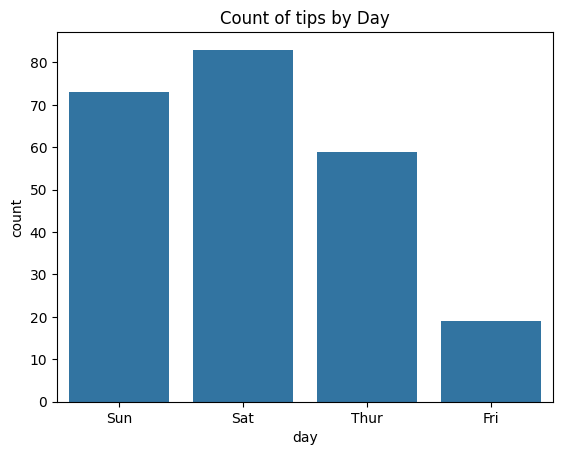

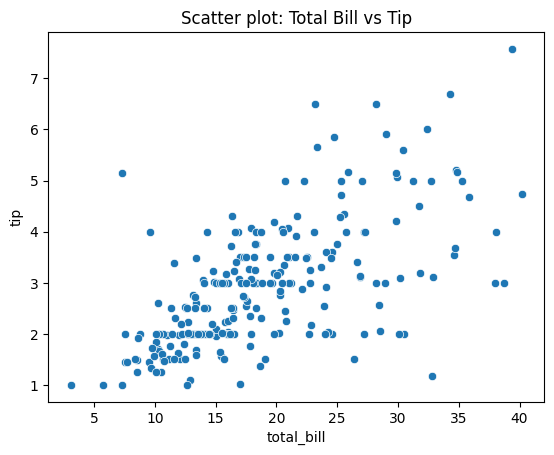

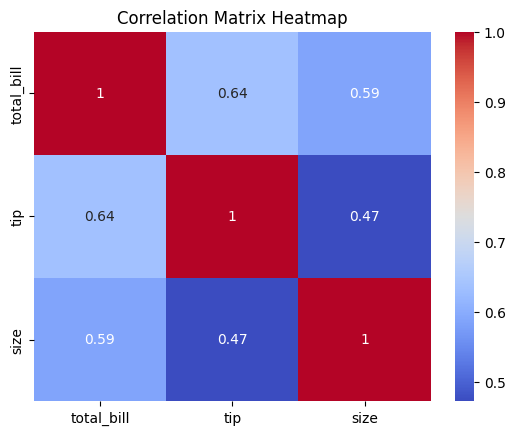

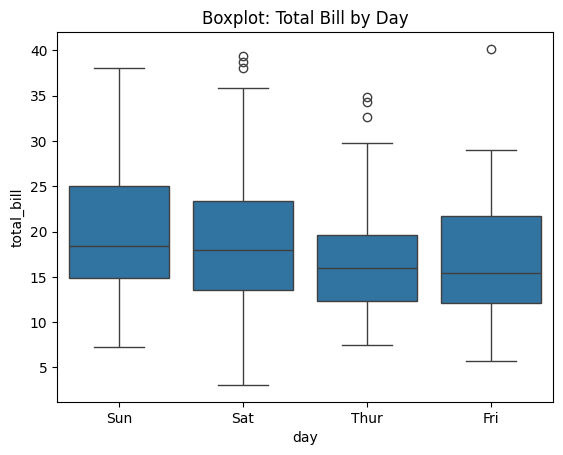

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Load dataset
df = pd.read_csv('C:/Users/Tarun/Downloads/tips.csv')


# 2. Data inspection
print(df.head())      # First 5 rows
print(df.tail())      # Last 5 rows
print(df.info())      # Data types and non-null count
print(df.describe())  # Summary statistics for numerical columns


# 3. Data Cleaning


# Check for missing values
print(df.isnull().sum())


# No missing values detected. If any, handle them here (e.g., imputation or removal)


# Check for duplicates
print(df.duplicated().sum())
df = df.drop_duplicates()


# 4. Identify and treat outliers


# Example: boxplot for 'total_bill'
plt.figure(figsize=(8,4))
sns.boxplot(x=df['total_bill'])
plt.title('Boxplot of Total Bill')
plt.show()


# Remove outliers based on IQR for 'total_bill'
Q1 = df['total_bill'].quantile(0.25)
Q3 = df['total_bill'].quantile(0.75)
IQR = Q3 - Q1
df_filtered = df[(df['total_bill'] >= (Q1 - 1.5*IQR)) & (df['total_bill'] <= (Q3 + 1.5*IQR))]


# 5. Univariate Analysis


# Numerical variables: mean, median, trimmed mean, range, variance, std deviation for 'total_bill'
print("Mean:", df_filtered['total_bill'].mean())
print("Median:", df_filtered['total_bill'].median())
from scipy.stats import trim_mean
print("Trimmed Mean (10%):", trim_mean(df_filtered['total_bill'], 0.1))
print("Range:", df_filtered['total_bill'].max() - df_filtered['total_bill'].min())
print("Variance:", df_filtered['total_bill'].var())
print("Std deviation:", df_filtered['total_bill'].std())


# Plot histogram, KDE, boxplot for 'total_bill'
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.histplot(df_filtered['total_bill'], kde=False, bins=20)
plt.title('Histogram of Total Bill')


plt.subplot(1,3,2)
sns.kdeplot(df_filtered['total_bill'])
plt.title('KDE Plot of Total Bill')


plt.subplot(1,3,3)
sns.boxplot(x=df_filtered['total_bill'])
plt.title('Boxplot of Total Bill')


plt.tight_layout()
plt.show()


# Categorical variables: frequency counts and mode for 'day'
print(df_filtered['day'].value_counts())
print("Mode of Day:", df_filtered['day'].mode()[0])


# Bar chart for 'day'
sns.countplot(x='day', data=df_filtered)
plt.title('Count of tips by Day')
plt.show()


# 6. Bivariate / Multivariate Analysis


# Scatter plot: total_bill vs tip
sns.scatterplot(x='total_bill', y='tip', data=df_filtered)
plt.title('Scatter plot: Total Bill vs Tip')
plt.show()


# Correlation matrix and heatmap
corr = df_filtered.corr(numeric_only=True)  # Added numeric_only=True to avoid error
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


# Grouped boxplot: total_bill by day
sns.boxplot(x='day', y='total_bill', data=df_filtered)
plt.title('Boxplot: Total Bill by Day')
plt.show()
